In [2]:
pip install ploty

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.metrics import mean_squared_error


In [4]:
df=pd.read_csv(r"F:\life_expectancy\Life Expectancy Data.csv")
df

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 1.Country: Country
2.	Year: Year
3.	Status: Country Developed or Developing status.
4.	Life expectancy: Life expectancy in age
5.	Adult Mortality:  Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6.	Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) -percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
7.	Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
8.	Measles : Measles - number of reported cases per 1000 population
9.	BMI : Average Body Mass Index of entire population
10.	under-five deaths : Number of under-five deaths per 1000 population
11.	Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)
12.	Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)
13.	Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
14.	HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)
15.	GDP : Gross Domestic Product per capita (in USD)
16.	Population : Population of the country
17.	thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
18.	thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)
19.	Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
20.	Schooling : Number of years of Schooling(years) ##


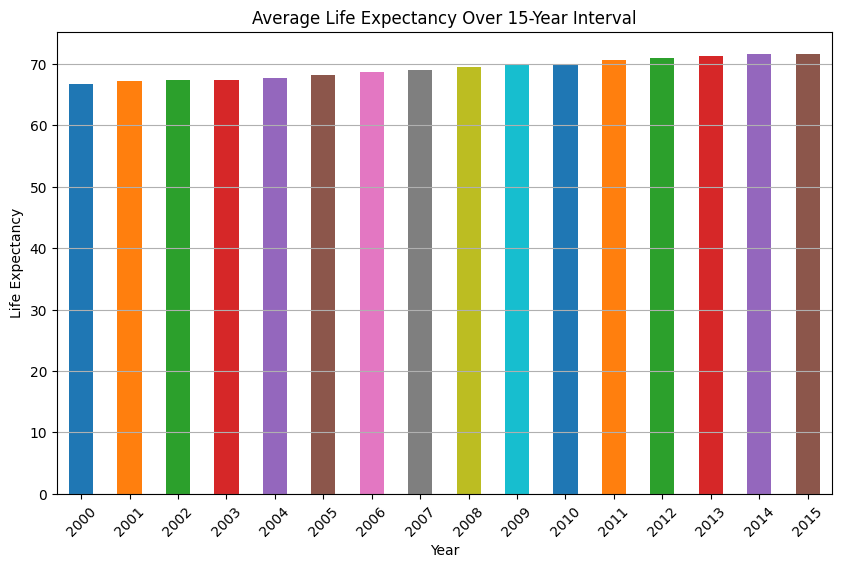

In [6]:
yearly_life_expectancy = df.groupby("Year")['Life_expectancy'].mean()
# Plotting
colors =list(mcolors.TABLEAU_COLORS.values())
plt.figure(figsize=(10, 6))
yearly_life_expectancy.plot(kind="bar", color=colors)
plt.title("Average Life Expectancy Over 15-Year Interval")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


<Axes: xlabel='Life_expectancy', ylabel='Count'>

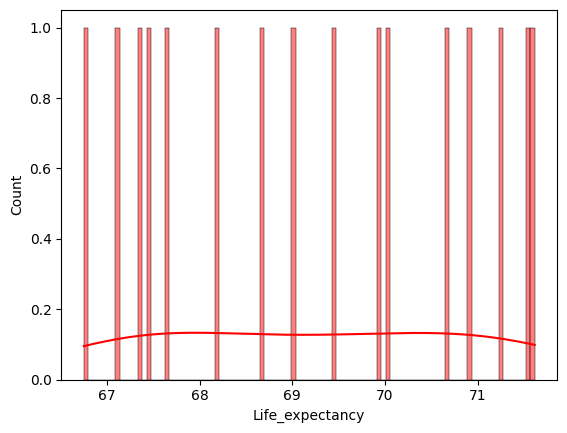

In [7]:
sns.histplot(yearly_life_expectancy.dropna(),kde=True,color="red",bins=100)

From the barplot diagram of life expectancy over 15 years interval of whole coutry's life expectancy we seen that over life expectancy in increasing nature with increasing the year . 

<Axes: ylabel='count'>

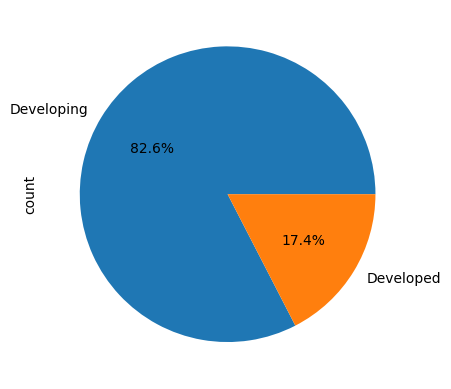

In [8]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

From the aspect of pie diagram we see that the life expectancy of developing country is greater than developed country 

In [9]:
df.shape


(2938, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

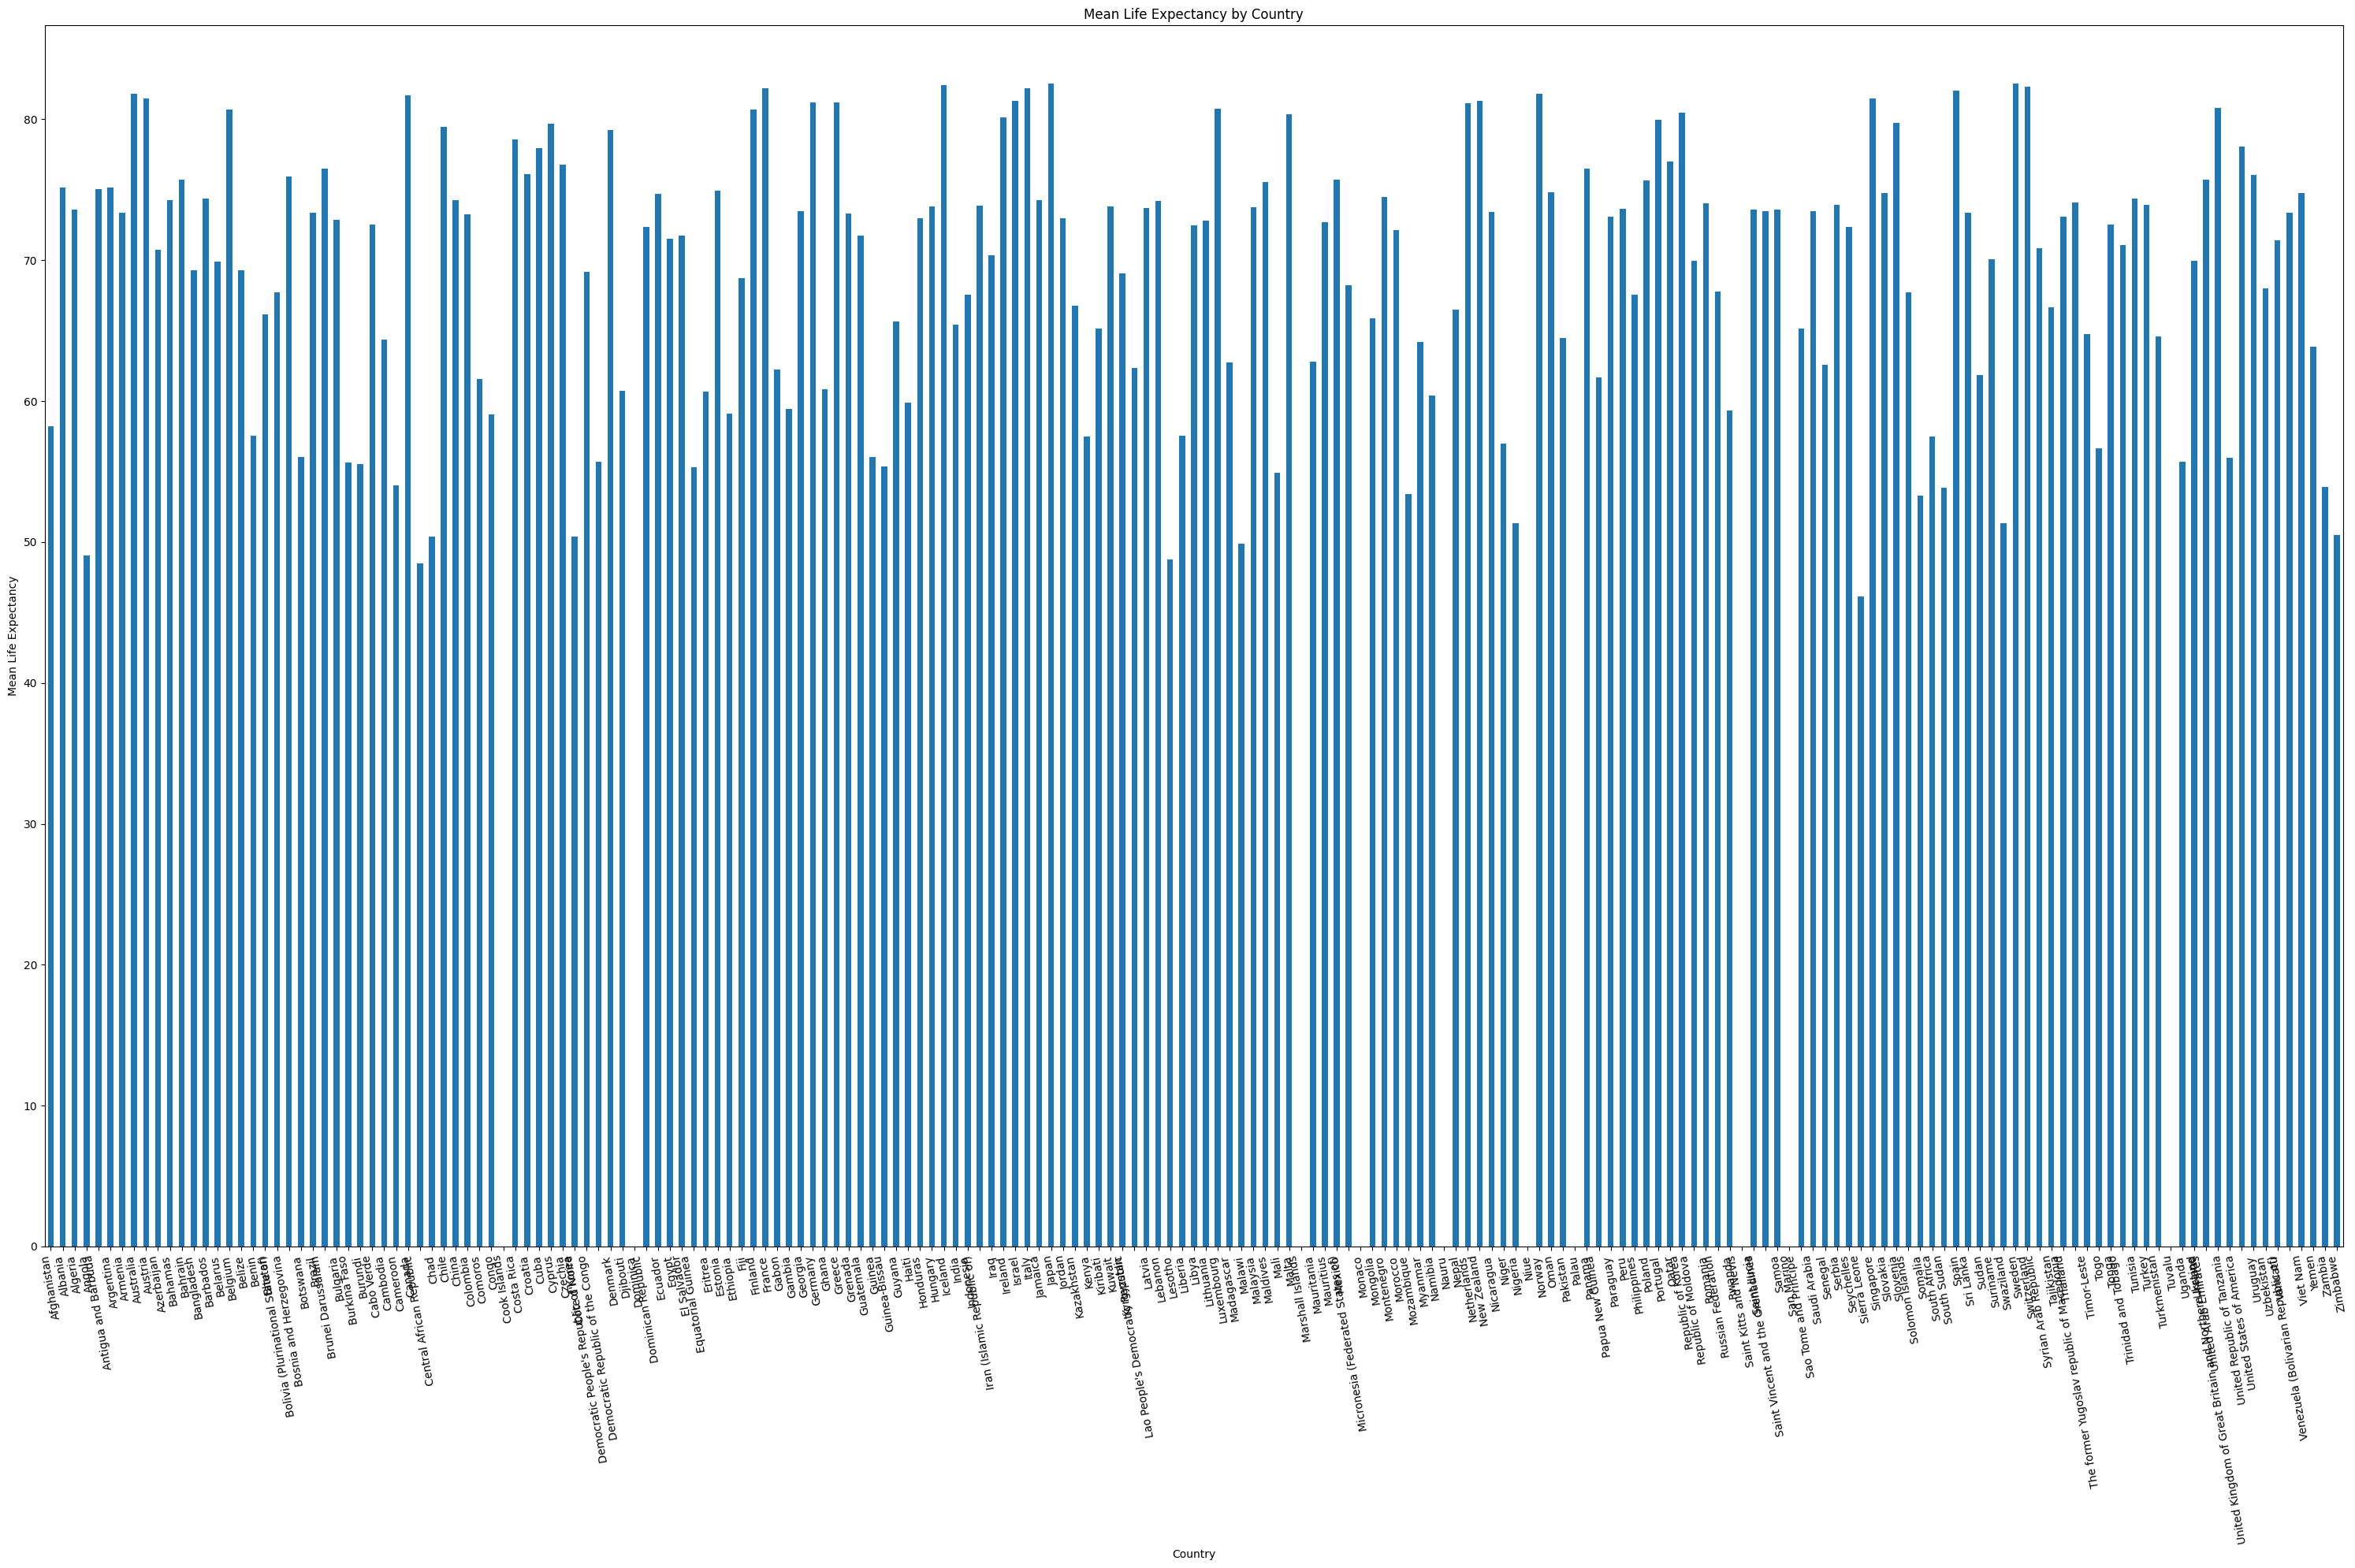

In [11]:
z = df.groupby("Country")["Life_expectancy"].mean()
plt.figure(figsize=(30, 20))
z.plot(kind='bar')
plt.title('Mean Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation=100)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [12]:
#The columns with null value are 
#1.Life_expectancy
#2.Adult_mortality
#3.Alcohol
#4.Hepatitis B
#BMI
#Polio
#Total_expenditure
#Diphtheria
#GDP
#Population
#Thinness_1-19_years
#Thinness_5-9_years
#Income_composition_of_resources
#Schooling*##



In [13]:
# Transform the catagorical variable in numerical
df['Status'].unique()
# Columns to apply label encoding
cols_to_encode = ['Status']
# Apply label encoding to X
from sklearn.preprocessing import LabelEncoder
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])
    
   

In [14]:
df['Status'].unique()

array([1, 0])

In [15]:
data=df
data

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#Now we replace developed by 0 and developing by 1 in status column

In [16]:
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [12]:
# There  are more colums with null values but this is not enough for reject it then we handelling the missing value by descriptive measure.

In [13]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
data.reset_index(inplace=True)
data.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
imputed_data = []
for year in list(data.Year.unique()):
    year_data = data[data.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
life_expectancy = pd.concat(imputed_data).copy()



In [15]:
life_expectancy.isnull().sum()

index                              0
Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [16]:
#Statistical information for numerical feature.
life_expectancy.iloc[:, 4:].describe().T

,count,mean,std,min,25%,50%,75%,max
Life_expectancy,2938.0,6.923846e+01,9.510459e+00,36.30000,63.200000,7.210000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.646950e+02,1.240924e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.637600e+00,3.921306e+00,0.01000,1.082500,4.100000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.264466e+01,2.288189e+01,1.00000,82.000000,9.100000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.838656e+01,1.993969e+01,1.00000,19.400000,4.345000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03
Polio,2938.0,8.260534e+01,2.336273e+01,3.00000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01


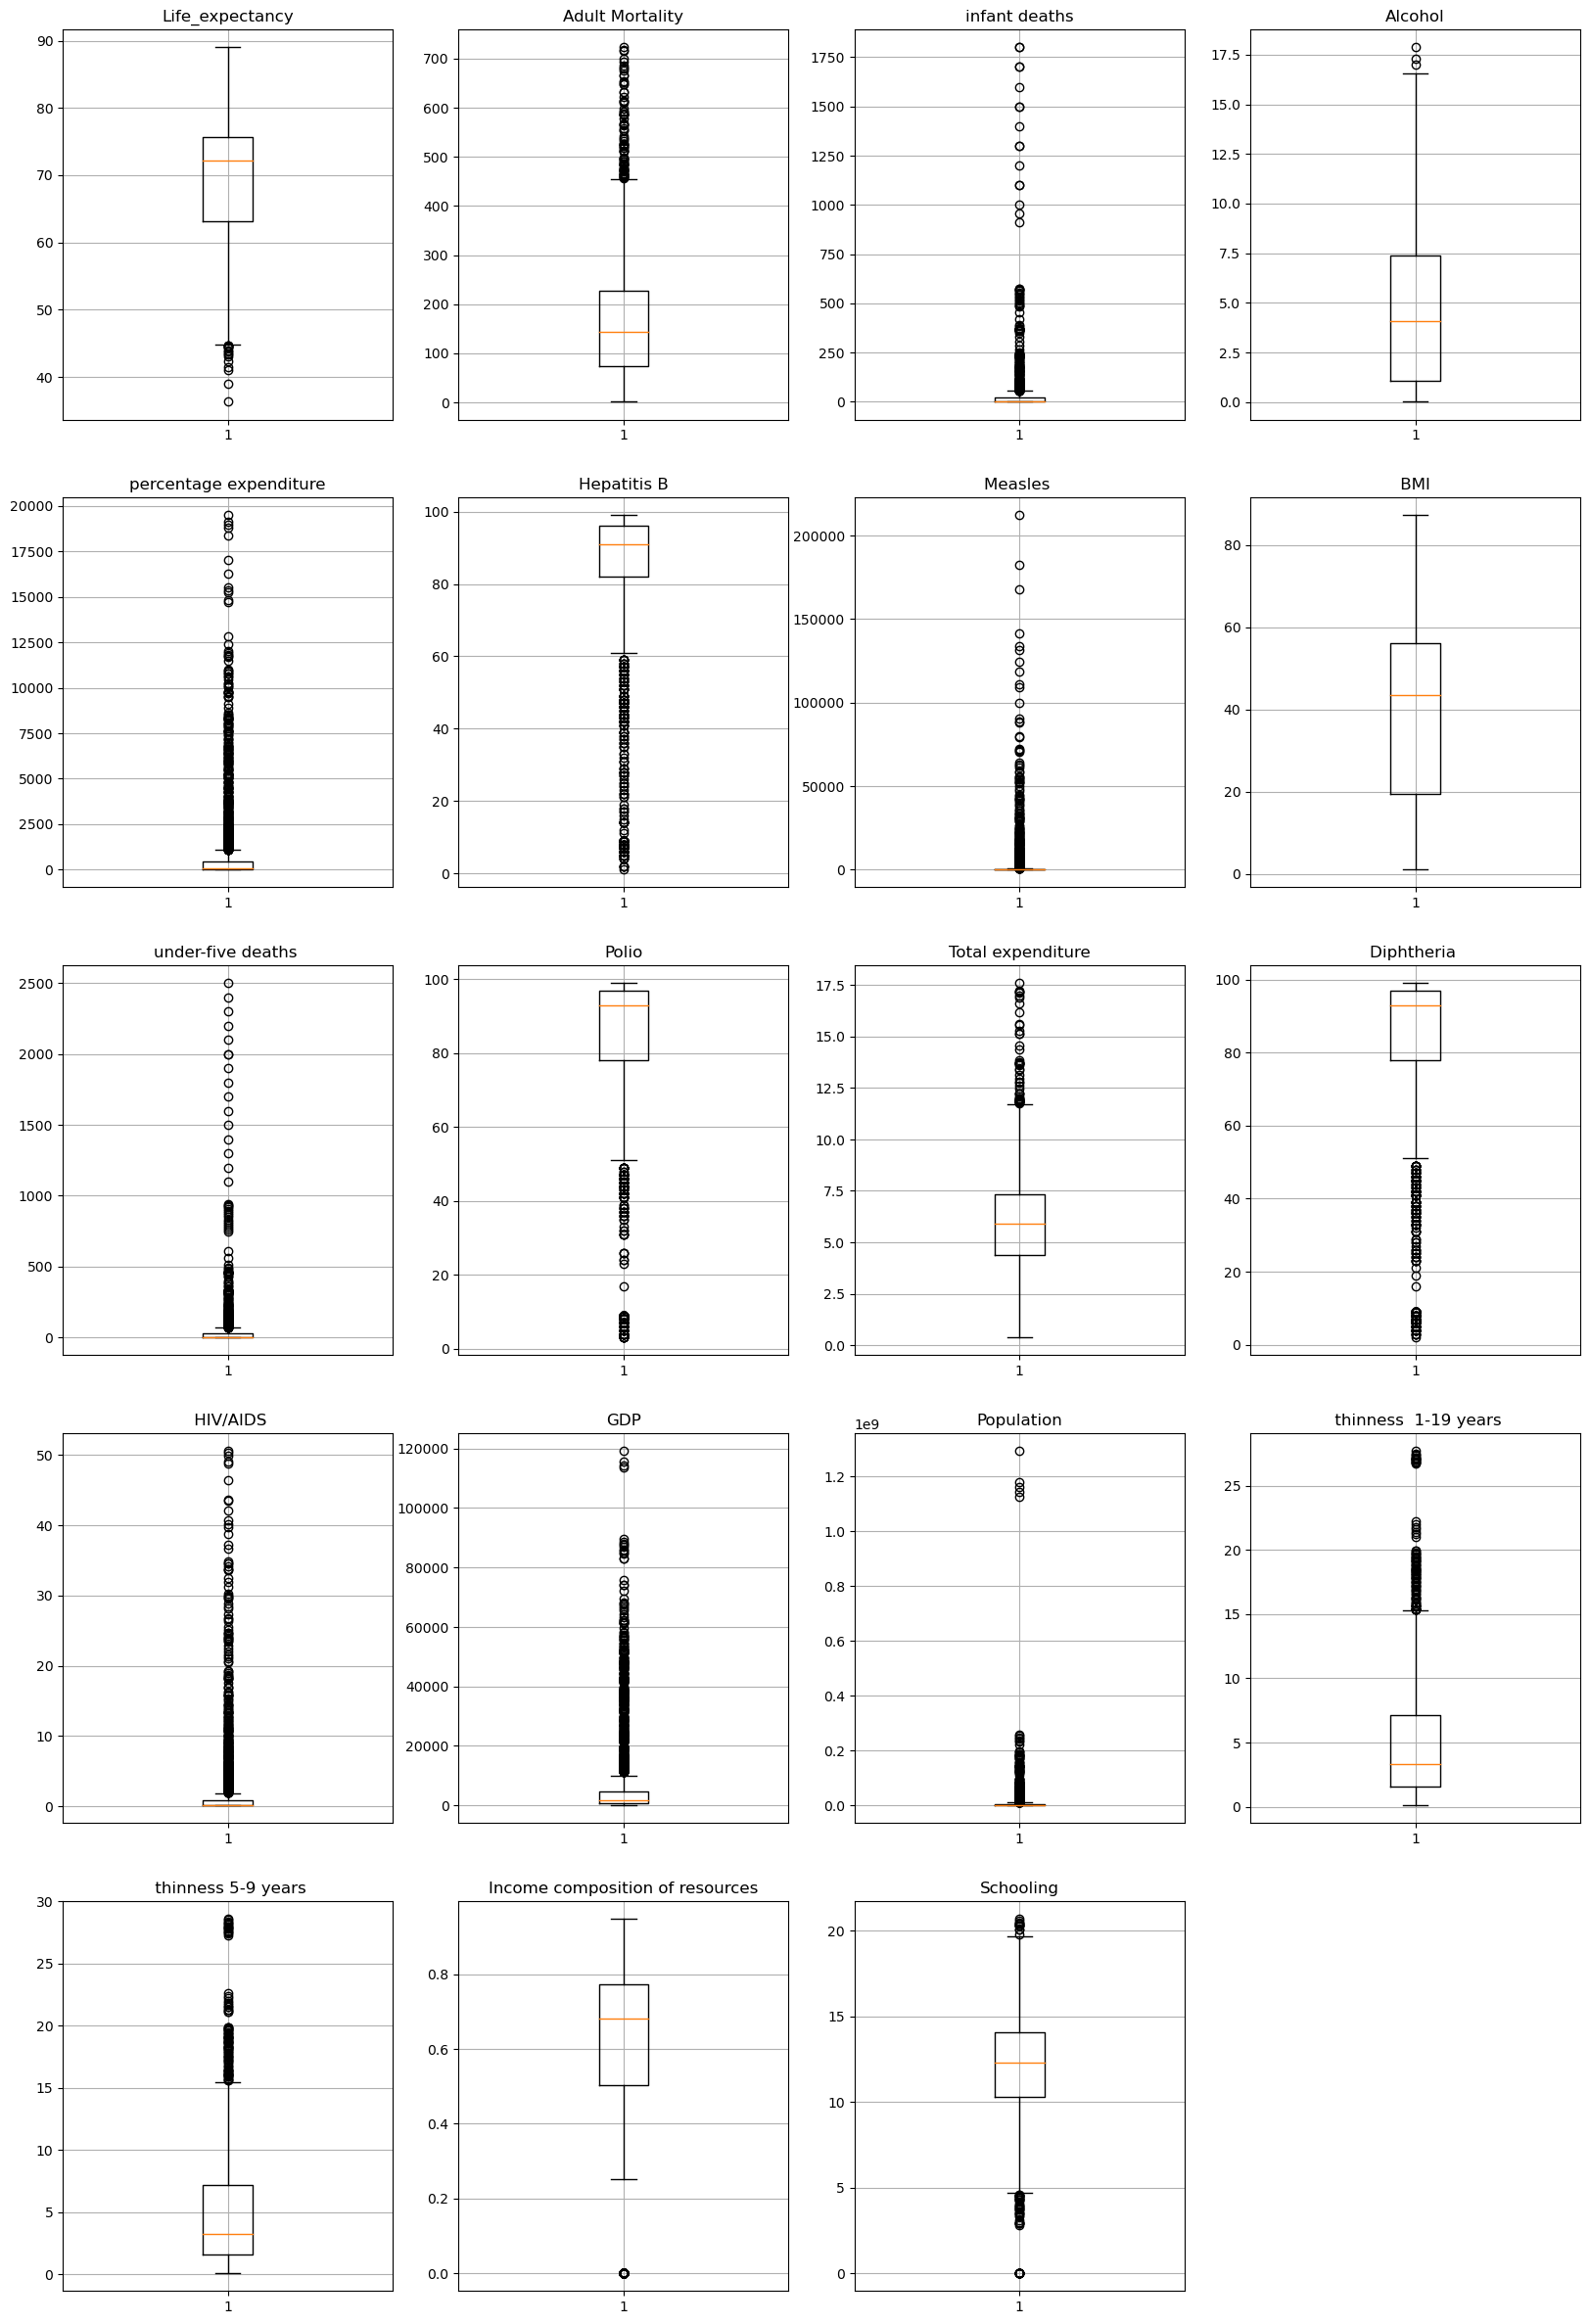

In [17]:
col_dict = {'Life_expectancy':1,'Adult Mortality':2,'infant deaths':3,'Alcohol':4,'percentage expenditure':5,'Hepatitis B':6,'Measles ':7,' BMI ':8,'under-five deaths ':9,'Polio':10,'Total expenditure':11,'Diphtheria ':12,' HIV/AIDS':13,'GDP':14,'Population':15,' thinness  1-19 years':16,' thinness 5-9 years':17,'Income composition of resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_expectancy[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

In [18]:
#Infant_Deaths represents several infant deaths per 1,000 population. That is why the number beyond 1000 is unrealistic. We will therefore remove them as outliers. The same is true for measles and deaths under five, as both are a number per 1,000 population.

In [19]:
life_expectancy.columns

Index(['index', 'Country', 'Year', 'Status', 'Life_expectancy',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
life_expectancy

,index,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,2015,1,65.0,263.0,62,0.010,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,16,Albania,2015,1,77.8,74.0,0,4.600,364.975229,99.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,32,Algeria,2015,1,75.6,19.0,21,5.285,0.000000,95.0,...,95.0,7.08,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,48,Angola,2015,1,52.4,335.0,66,5.285,0.000000,64.0,...,7.0,7.08,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,64,Antigua and Barbuda,2015,1,76.4,13.0,0,5.285,0.000000,99.0,...,86.0,7.08,99.0,0.2,13566.954100,2076086.0,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,2873,Venezuela (Bolivarian Republic of),2000,1,72.5,168.0,11,8.010,0.000000,5.0,...,86.0,4.91,77.0,0.1,828.989862,1243229.0,1.8,1.7,0.670,10.6
2889,2889,Viet Nam,2000,1,73.4,139.0,33,1.600,0.000000,89.0,...,96.0,4.89,96.0,0.1,828.989862,1243229.0,15.8,16.4,0.569,10.4
2905,2905,Yemen,2000,1,68.0,252.0,48,0.070,0.000000,14.0,...,74.0,4.14,74.0,0.1,828.989862,1243229.0,14.1,14.1,0.436,7.7
2921,2921,Zambia,2000,1,43.8,614.0,44,2.620,45.616880,89.0,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


fit the a linear regression model

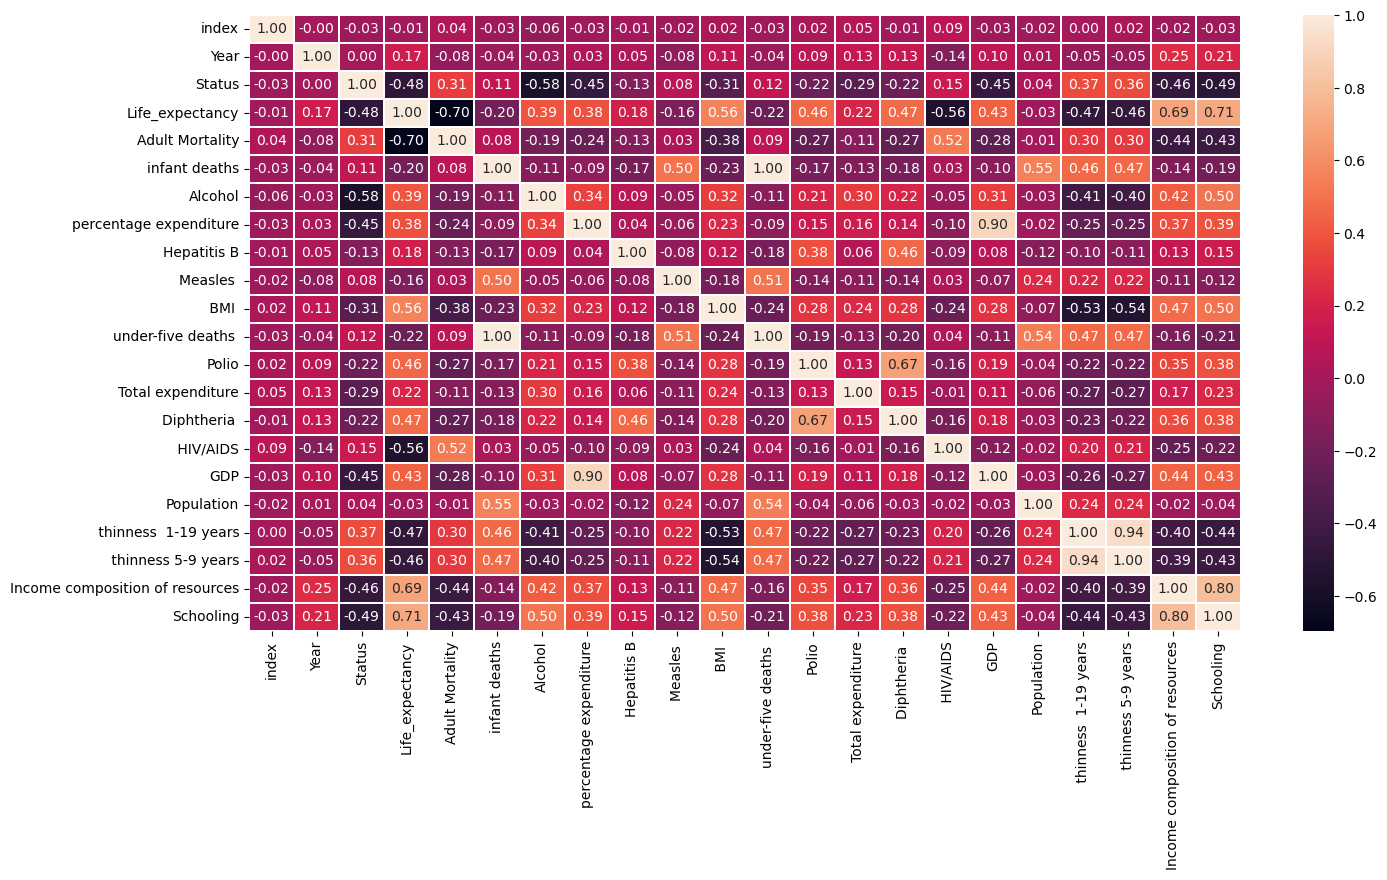

In [21]:
plt.figure(figsize = (16,8))
sns.heatmap(life_expectancy.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

In [88]:
x_test=life_expectancy[["Status",' thinness  1-19 years','Income composition of resources','Measles ','Adult Mortality','Alcohol','Polio','Population','GDP','Diphtheria ']]
y_test=life_expectancy['Life_expectancy']

In [75]:
y_pred = lr.predict(x_test)
residuals = y_test - y_pred
absolute_residuals = np.abs(residuals)

<Axes: xlabel='Life_expectancy', ylabel='Count'>

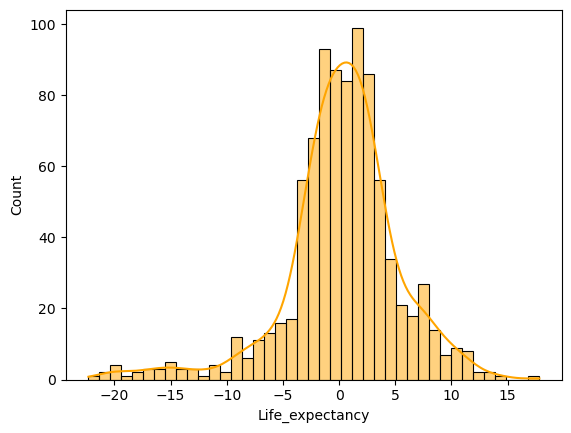

In [76]:
sns.histplot(residuals,kde=True,color="orange")

In [78]:
r_squared = r2_score(y_test, y_pred)
print("R-squared score:", r_squared)
mean_squared_error(y_test,y_pred)


R-squared score: 0.7234871357449236


26.107045474255223

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as s

In [81]:
t=sm.add_constant(x_test)
reg=sm.OLS(y_test,t)
fit=reg.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     826.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:17:35   Log-Likelihood:                -8815.1
No. Observations:                2938   AIC:                         1.765e+04
Df Residuals:                    2927   BIC:                         1.772e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [122]:
residuals=fit.resid
residuals  ##residuals of the model

0       8.564341
16      1.850678
32     -0.591320
48     -4.976546
64     -1.353467
          ...   
2873    2.520772
2889    7.114366
2905    8.155317
2921   -5.432381
2937   -1.572796
Length: 2938, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_test, y_test, test_size=0.2,random_state=88)

In [94]:
x_train

,Status,thinness 1-19 years,Income composition of resources,Measles,Adult Mortality,Alcohol,Polio,Population,GDP,Diphtheria
672,1,3.6,0.679,0,115.0,3.92,98.0,1243229.0,2741.115420,95.0
2841,1,3.4,0.000,80,189.0,1.60,99.0,24654.0,558.221144,99.0
2130,0,3.4,0.733,117,165.0,9.82,97.0,21451748.0,3552.924520,97.0
833,1,2.1,0.607,0,218.0,2.79,98.0,5867626.0,2238.411600,99.0
2745,1,3.0,0.669,817,257.0,4.49,99.0,49175848.0,635.789635,99.0
...,...,...,...,...,...,...,...,...,...,...
2621,1,7.1,0.457,187,34.0,1.44,85.0,6679282.0,562.339359,85.0
1289,0,0.5,0.866,1617,61.0,7.96,96.0,58826731.0,464.184650,96.0
1110,1,5.6,0.624,0,229.0,7.56,93.0,7491.0,3439.597513,93.0
2357,0,2.0,0.843,0,119.0,11.58,95.0,1995733.0,1488.471540,95.0


In [90]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [91]:
lr.intercept_

61.929253383306744

In [93]:
lr.coef_

array([-1.68893030e+00, -3.77045445e-01,  1.21319621e+01, -5.53263782e-05,
       -3.20892177e-02,  1.48479008e-01,  5.68564454e-02,  9.07019493e-09,
        4.47902163e-05,  3.16788639e-02])

SO the linear model  is: Life_expectancy=61.929253383306744+-1.68893030e+00*Status+	-3.77045445e-01*thinness 1-19 years+	1.21319621e+01*Income composition of resources+	-5.53263782e-05*Measles+-3.20892177e-02*Adult Mortality+1.48479008e-01*Alcohol+	5.68564454e-02*Polio	+9.07019493e-09*Population	+4.47902163e-05*GDP+3.16788639e-02*Diphtheria
.


In [100]:
y_predict=lr.predict(x_test)
print(y_predict)

[53.79695569 76.28319326 76.12123341 ... 58.73744833 49.01333891
 47.22728936]


In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)  ## small MSE means good model .

24.247584290321246

In [103]:
lr.score(x_test,y_test) ## R^2  ## for testing model


0.7318280584307553

that means 73% of the variability of the variable life expectancy is explained with the help of this dependent variable.

In [104]:
#removing multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
{t.columns[i]: variance_inflation_factor(t.values,i) for i in range(1,t.shape[1])}

{'Status': 1.8098868479343853,
 ' thinness  1-19 years': 1.4811158937877806,
 'Income composition of resources': 1.7583016337708148,
 'Measles ': 1.1150155083972784,
 'Adult Mortality': 1.3333168478512138,
 'Alcohol': 1.689782787446495,
 'Polio': 1.8944012148945868,
 'Population': 1.1157112818609016,
 'GDP': 1.3749250809866251,
 'Diphtheria ': 1.9124023328900446}